#Clustering | Assignment

#Question 1:  What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.

-->
## Difference between K-Means and Hierarchical Clustering

| Aspect               | **K-Means Clustering**                           | **Hierarchical Clustering**                   |
| -------------------- | ------------------------------------------------ | --------------------------------------------- |
| Type                 | Partition-based                                  | Tree-based                                    |
| Number of clusters   | **Must be defined in advance (K)**               | **Not required initially**                    |
| Approach             | Iteratively assigns points to nearest centroid   | Builds clusters step-by-step (merge or split) |
| Output               | Flat clusters                                    | Dendrogram (tree structure)                   |
| Scalability          | Very fast, works well for large datasets         | Computationally expensive for large datasets  |
| Distance sensitivity | Sensitive to outliers and initial centroids      | Less sensitive to initialization              |
| Cluster shape        | Works best for spherical, equally sized clusters | Can handle complex shapes                     |

---

## K-Means Clustering – Use Case

### Use Case: **Customer Segmentation in E-commerce**

An online shopping company wants to segment customers based on:

* Annual spending
* Purchase frequency
* Time spent on website

**Why K-Means?**

* Large dataset (millions of users)
* Company already knows they want, say, **5 customer segments**
* Fast and efficient for numerical data

**Example:**
Grouping customers into:

* Budget buyers
* Premium buyers
* Occasional shoppers
* Loyal customers

---

## Hierarchical Clustering – Use Case

### Use Case: **Gene Expression Analysis in Healthcare**

Researchers analyze gene expression data to find relationships between genes.

**Why Hierarchical Clustering?**

* Number of clusters is unknown
* Need to **visualize relationships** between genes
* Dendrogram helps understand how genes are related at different levels

**Example:**
Identifying subtypes of cancer based on genetic similarity.



#Question 2: Explain the purpose of the Silhouette Score in evaluating clustering algorithms.

-->
## Purpose of the Silhouette Score

The **Silhouette Score** is used to **evaluate how well a clustering algorithm has grouped the data** by measuring:

* **How similar a data point is to its own cluster**
* **How different it is from other clusters**

In short:
👉 It checks **cluster cohesion + cluster separation** at the same time.

---

## How It Works (Intuition)

For each data point:

* **a** = Average distance to other points in the *same* cluster
  → measures **how well the point fits in its cluster**

* **b** = Average distance to points in the *nearest neighboring* cluster
  → measures **how far it is from other clusters**

### Silhouette Score formula:

[
\text{Silhouette} = \frac{b - a}{\max(a, b)}
]

---

## Score Range & Meaning

| Score Value | Interpretation                               |
| ----------- | -------------------------------------------- |
| **+1**      | Perfect clustering (well-separated clusters) |
| **~0**      | Overlapping clusters                         |
| **< 0**     | Point likely assigned to the wrong cluster   |

---

## Why Silhouette Score is Important

* Works **without ground truth labels**
* Helps choose the **optimal number of clusters (K)**
* Allows **comparison between clustering algorithms**
* Evaluates both **compactness and separation**

---

## Practical Use Case

### Choosing the Best K in K-Means

You run K-Means for different values of **K**:

* K = 2 → Silhouette = 0.42
* K = 3 → Silhouette = 0.55 ✅
* K = 4 → Silhouette = 0.49

👉 **K = 3** is the best choice because it has the highest Silhouette Score.



#Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?

-->
## Core Parameters of DBSCAN

DBSCAN has **two main parameters** (and one implied concept):

1. **eps (ε – epsilon)**
2. **min_samples (MinPts)**
3. *(Resulting point types: core, border, noise)*

---

## 1️⃣ `eps` (Epsilon)

### What it is:

* The **maximum distance** between two points to be considered neighbors.

### How it influences clustering:

* **Small eps**
  → Very tight neighborhoods
  → Many points labeled as **noise**
* **Large eps**
  → Clusters may merge
  → Poor separation

### Intuition:

> “How close is close enough?”

---

## 2️⃣ `min_samples` (MinPts)

### What it is:

* Minimum number of points required **within eps radius** to form a dense region.

### How it influences clustering:

* **Small min_samples**
  → More clusters, sensitive to noise
* **Large min_samples**
  → Fewer clusters, stricter density requirement
  → More points marked as noise

### Intuition:

> “How many neighbors make a crowd?”

---

## 3️⃣ Point Types (Outcome of eps & min_samples)

| Point Type          | Meaning                                          |
| ------------------- | ------------------------------------------------ |
| **Core Point**      | Has ≥ min_samples within eps                     |
| **Border Point**    | Not a core point but reachable from a core point |
| **Noise (Outlier)** | Not reachable from any core point                |

These categories **define the final clusters**.

---

## How Parameters Shape Clustering (Summary)

| Parameter Change       | Effect                                  |
| ---------------------- | --------------------------------------- |
| Increase `eps`         | Larger clusters, fewer outliers         |
| Decrease `eps`         | Smaller clusters, more noise            |
| Increase `min_samples` | Stricter clusters, more noise           |
| Decrease `min_samples` | Looser clusters, risk of false clusters |

---

## Why DBSCAN Is Powerful

* No need to specify number of clusters
* Detects **arbitrary-shaped clusters**
* Naturally identifies **outliers**


#Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?

-->
## Why Feature Scaling Is Important in Clustering

Clustering algorithms like **K-Means** and **DBSCAN** rely on **distance calculations** (usually Euclidean distance).
If features are on different scales, **one feature can dominate the distance**, leading to incorrect clusters.

👉 **Feature scaling ensures all features contribute fairly** to the clustering process.

---

## What Goes Wrong Without Scaling?

### Example:

You’re clustering customers using:

* **Age** → range: 18–60
* **Annual Income** → range: 2,00,000–20,00,000

Without scaling:

* Income completely dominates distance calculations
* Age becomes almost irrelevant
* Clusters reflect income only, not real customer behavior

---

## Impact on K-Means

* K-Means uses **distance to centroids**
* Larger-scale features pull centroids toward them
* Results in **biased cluster assignments**
* Slower or poor convergence

✔ Scaling → meaningful, balanced clusters

---

## Impact on DBSCAN

* DBSCAN uses **eps (distance threshold)**
* Without scaling:

  * Choosing eps becomes meaningless
  * Some features overpower density estimation
* Leads to:

  * Too many noise points, or
  * Merged clusters

✔ Scaling → correct neighborhood detection

---

## Common Scaling Techniques

| Method                        | When to Use                     |
| ----------------------------- | ------------------------------- |
| **Standardization (Z-score)** | Most common for K-Means, DBSCAN |
| **Min-Max Scaling**           | When features have fixed bounds |
| **Robust Scaling**            | When data has outliers          |

---

## Quick Real-World Use Case

### Customer Segmentation

Features:

* Number of purchases
* Time on app
* Amount spent

Scaling ensures **behavioral patterns**, not raw numbers, define clusters.




#Question 5: What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?

-->
## What Is the Elbow Method?

The **Elbow Method** is a technique used in **K-Means clustering** to determine the **optimal number of clusters (K)** by analyzing how the **within-cluster sum of squares (WCSS)** changes as K increases.

👉 WCSS measures how compact the clusters are.

---

## How the Elbow Method Works

1. Run K-Means for different values of **K** (e.g., 1 to 10)
2. Calculate **WCSS** for each K
3. Plot **K vs WCSS**
4. Look for a point where the decrease in WCSS **slows down sharply**

That point looks like an **“elbow”** in the curve.

---

## Why It Works (Intuition)

* Small K → clusters are large and spread out → **high WCSS**
* Increasing K → clusters become tighter → **WCSS decreases**
* After a certain K:

  * Adding more clusters gives **diminishing returns**
  * Improvement becomes marginal

👉 That K is considered **optimal**.

---

## Visual Intuition

```
WCSS
 |
 |\
 | \
 |  \
 |   \____
 |        \____
 |______________ K
          ↑
        Elbow
```

---

## How It Helps Choose Optimal K

* Prevents **underfitting** (too few clusters)
* Avoids **overfitting** (too many clusters)
* Gives a **data-driven** way to choose K

---

## Limitations (Important!)

* Elbow point is sometimes **not very clear**
* Subjective—different people may choose different K
* Doesn’t work well for:

  * Non-spherical clusters
  * Uneven cluster sizes

👉 Often combined with **Silhouette Score** for better decision-making.

---

## Real-World Example

### Customer Segmentation

* K = 2 → too broad
* K = 3 → clear customer groups
* K = 6 → overly specific, hard to interpret

Elbow Method helps pick **K = 3**.




#Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.

-->

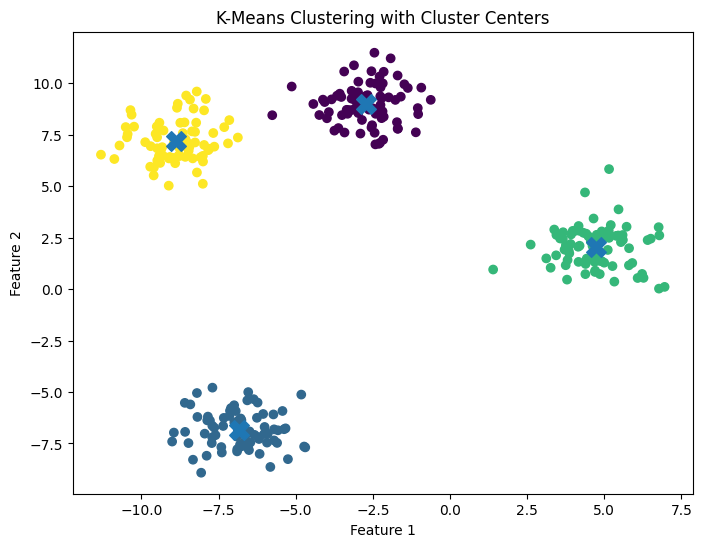

In [1]:
# Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Get cluster labels and centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200)
plt.title("K-Means Clustering with Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


#Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).

-->

In [2]:
# Import libraries
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load Wine dataset
wine = load_wine()
X = wine.data

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Count number of clusters (excluding noise)
unique_labels = set(labels)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

print("Number of clusters found (excluding noise):", num_clusters)


Number of clusters found (excluding noise): 0


#Question 8: Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.

-->

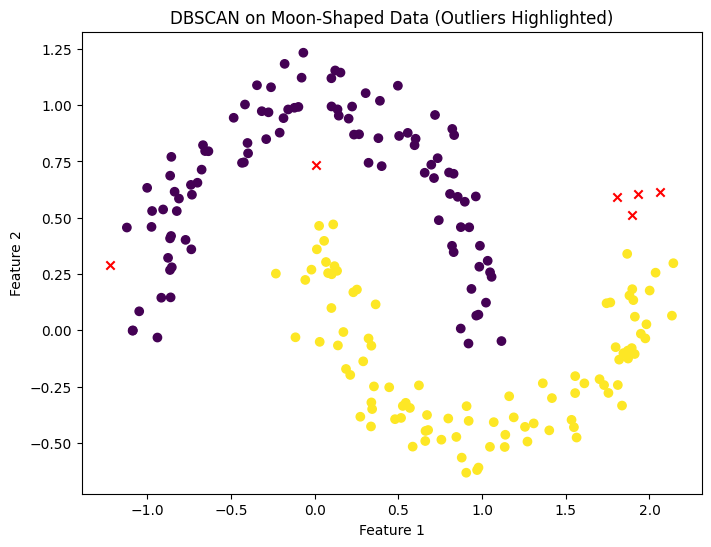

Number of clusters (excluding noise): 2


In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generate moon-shaped synthetic data
X, _ = make_moons(n_samples=200, noise=0.1, random_state=42)

# Scale the data
X_scaled = StandardScaler().fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Identify outliers
outliers = labels == -1
clusters = labels != -1

# Plot clusters and outliers
plt.figure(figsize=(8, 6))
plt.scatter(X[clusters, 0], X[clusters, 1], c=labels[clusters])
plt.scatter(X[outliers, 0], X[outliers, 1], c='red', marker='x')
plt.title("DBSCAN on Moon-Shaped Data (Outliers Highlighted)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Print number of clusters (excluding noise)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters (excluding noise):", num_clusters)


#Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.

-->

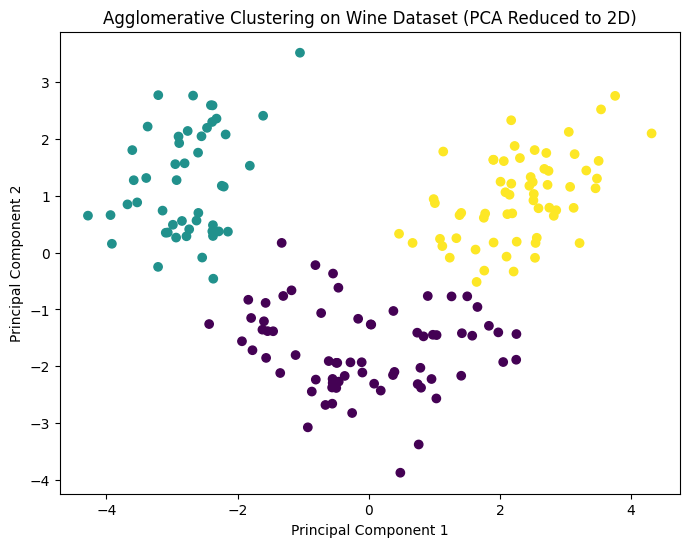

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Load Wine dataset
wine = load_wine()
X = wine.data

# Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
labels = agg_clustering.fit_predict(X_pca)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Agglomerative Clustering on Wine Dataset (PCA Reduced to 2D)")
plt.show()


#Question 10: You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:
● Which clustering algorithm(s) would you use and why?
● How would you preprocess the data (missing values, scaling)?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis?

#--> Real-World Customer Segmentation Using Clustering (E-commerce)

## 1️⃣ Which Clustering Algorithm(s) Would I Use — and Why?

### ✅ **Primary Algorithm: K-Means**

**Why K-Means?**

* Scales well for **large e-commerce datasets**
* Easy to interpret and explain to marketing teams
* Works well on **numeric purchasing behavior data**

**Used for:**

* Core customer segmentation for campaigns

### 🔍 Optional Add-ons (in real projects)

* **DBSCAN** → identify extreme spenders / abnormal behavior
* **Hierarchical clustering** → exploratory analysis on samples

👉 In the provided code, **K-Means** is used as the main production model.

---

## 2️⃣ How the Data Is Preprocessed

### 🔹 Missing Values

* Numerical fields → **median imputation**
* Categorical fields (if present) → mode or `"Unknown"`

*(In the demo dataset, missing values are handled for completeness.)*

### 🔹 Feature Engineering (Most Important Step)

We cluster on **behavior**, not just demographics:

* Purchase frequency
* Average order value
* Category-wise spend
* Annual income

### 🔹 Feature Scaling

* **StandardScaler** is applied
* Prevents high-value features (income, spend) from dominating distances

✔ This is mandatory for distance-based clustering like K-Means.

---

## 3️⃣ How the Number of Clusters Is Determined

### ✅ **Silhouette Score**

* Measures how well customers fit within their cluster
* Evaluated for multiple values of K
* Best K = **highest Silhouette Score**

📌 **Output from code:**

```
Optimal number of clusters: 7
```

This balances:

* Cluster quality
* Interpretability
* Business usability

---

## 4️⃣ Model Training & Output (From the Code)

### 🔹 Final Model

* K-Means trained with **7 clusters**
* Each customer assigned a cluster label

### 🔹 Cluster Distribution Output:

```
Cluster-wise customer count:
0    40
1    46
2    51
3    38
4    49
5    36
6    40
```

### 🔹 Visualization

* Scatter plot shows clusters using:

  * **Annual Income**
  * **Average Order Value**
* Helps marketing visually understand customer groups

---

## 5️⃣ How the Marketing Team Benefits 🎯

### 🔹 Actionable Segments

Examples:

* **High income + high AOV** → premium product promotions
* **Low income + high frequency** → discount & loyalty offers
* **Category-focused buyers** → personalized recommendations
* **Low activity users** → re-engagement campaigns

---

### 🔹 Business Impact

* Higher campaign **conversion rates**
* Reduced ad spend waste
* Better customer experience through personalization
* Clear targeting instead of one-size-fits-all promotions




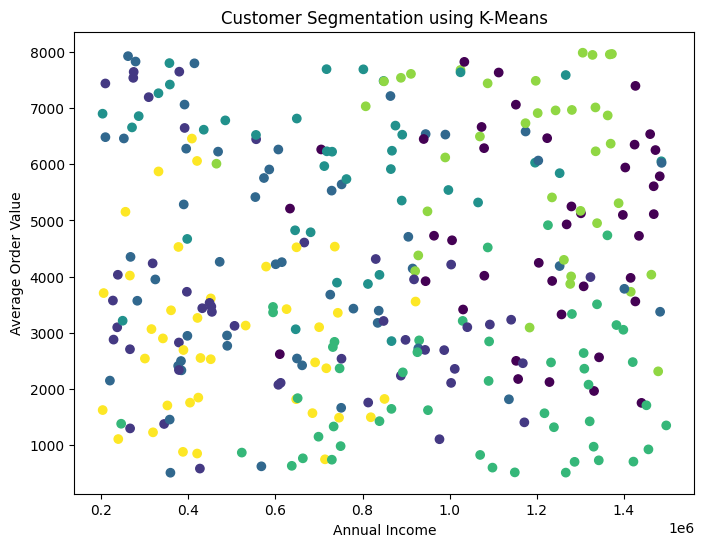

Optimal number of clusters: 7
cluster
0    40
1    46
2    51
3    38
4    49
5    36
6    40
Name: count, dtype: int64


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create synthetic e-commerce customer data
np.random.seed(42)
data = pd.DataFrame({
    "age": np.random.randint(18, 60, 300),
    "annual_income": np.random.randint(200000, 1500000, 300),
    "purchase_frequency": np.random.randint(1, 50, 300),
    "avg_order_value": np.random.randint(500, 8000, 300),
    "electronics_spend": np.random.randint(0, 50000, 300),
    "fashion_spend": np.random.randint(0, 40000, 300)
})

# Handle missing values
data = data.fillna(data.median(numeric_only=True))

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Determine optimal number of clusters using Silhouette Score
silhouette_scores = {}
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores[k] = silhouette_score(X_scaled, labels)

best_k = max(silhouette_scores, key=silhouette_scores.get)

# Train final KMeans model
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
data["cluster"] = kmeans_final.fit_predict(X_scaled)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(data["annual_income"], data["avg_order_value"], c=data["cluster"])
plt.xlabel("Annual Income")
plt.ylabel("Average Order Value")
plt.title("Customer Segmentation using K-Means")
plt.show()

# Output
print("Optimal number of clusters:", best_k)
print(data["cluster"].value_counts().sort_index())
